<a href="https://colab.research.google.com/github/jittinabraham/ADSB_signalAnalysis_from-Airplane_using_RTL-SDR/blob/master/leNET5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib as plt
import os
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from google.colab import drive
drive.mount('/content/gdrive')
root_dir = 'gdrive/MyDrive/mnist/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
model=models.Sequential()
model.add(layers.Conv2D( 6, (5, 5),padding = 'same', activation='relu',input_shape=(28,28,1)))
model.summary()
#model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16 , (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D( 120, (5, 5), activation='relu'))
model.summary()


Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_109 (Conv2D)         (None, 28, 28, 6)         156       
                                                                 
 conv2d_110 (Conv2D)         (None, 24, 24, 16)        2416      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                

In [ ]:
model.add(layers.Flatten())

model.add(layers.Dense( 120, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 14, 14, 6)         1356      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 6)          0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 1, 1, 10)          2950      
                                                                 
 flatten_3 (Flatten)         (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 4,416
Trainable params: 4,416
Non-trainable params: 0
___________________________________________________

In [ ]:
(train_images_org, train_labels_org), (test_images_org,test_labels_org) = mnist.load_data()
# Display the dimensions of the original training set


In [ ]:
print(train_images_org.shape)
# smaller set
a = 30000
b = 4000
train_images = train_images_org[0:a]
train_labels = train_labels_org[0:a]

(60000, 28, 28)


In [ ]:
test_images = test_images_org[0:b]
test_labels = test_labels_org[0:b]
# Display the dimensions of the reduced training set (for control)
print(train_images.shape)

(30000, 28, 28)


In [ ]:
# prepare data sets for Keras, 1st reshape, then normalize
train_images = train_images.reshape((a, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((b, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
# set the training paramters to RMSprop, and the loss according to ...

model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
# Train the model. Record the results for later analysis
history = model.fit(train_images, train_labels, epochs=30,batch_size=32)
# save the trained model to your desired location
save_dir = os.path.join(root_dir, 'mnist_conv_net.h5')
model.save(save_dir)

Epoch 1/30
938/938 [==============================] - 5s 4ms/step - loss: 5.1163e-08 - accuracy: 1.0000
Epoch 2/30
938/938 [==============================] - 4s 5ms/step - loss: 3.7844e-08 - accuracy: 1.0000
Epoch 3/30
938/938 [==============================] - 4s 5ms/step - loss: 3.2305e-08 - accuracy: 1.0000
Epoch 4/30
938/938 [==============================] - 4s 4ms/step - loss: 2.8817e-08 - accuracy: 1.0000
Epoch 5/30
938/938 [==============================] - 4s 4ms/step - loss: 2.6345e-08 - accuracy: 1.0000
Epoch 6/30
938/938 [==============================] - 5s 5ms/step - loss: 2.4334e-08 - accuracy: 1.0000
Epoch 7/30
938/938 [==============================] - 4s 4ms/step - loss: 2.2769e-08 - accuracy: 1.0000
Epoch 8/30
938/938 [==============================] - 4s 4ms/step - loss: 2.1442e-08 - accuracy: 1.0000
Epoch 9/30
938/938 [==============================] - 5s 5ms/step - loss: 2.0381e-08 - accuracy: 1.0000
Epoch 10/30
938/938 [==============================] - 4s 4ms/st

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
# show the accuracy
print('Test accuracy: ', test_acc*100)

125/125 [==============================] - 1s 5ms/step - loss: 0.1673 - accuracy: 0.9872
Test accuracy:  98.72499704360962


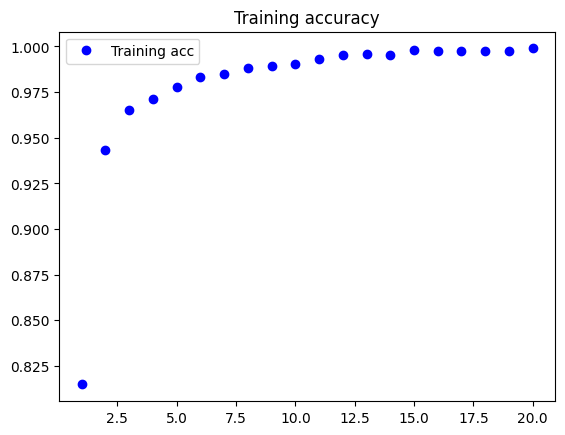

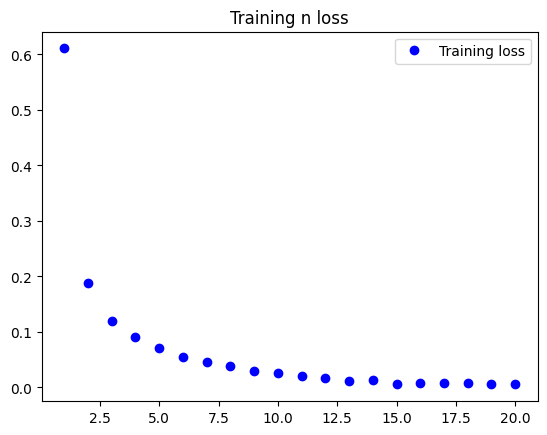

# New Section